## We'll be looking now at the spatial representation of ICC with QPP

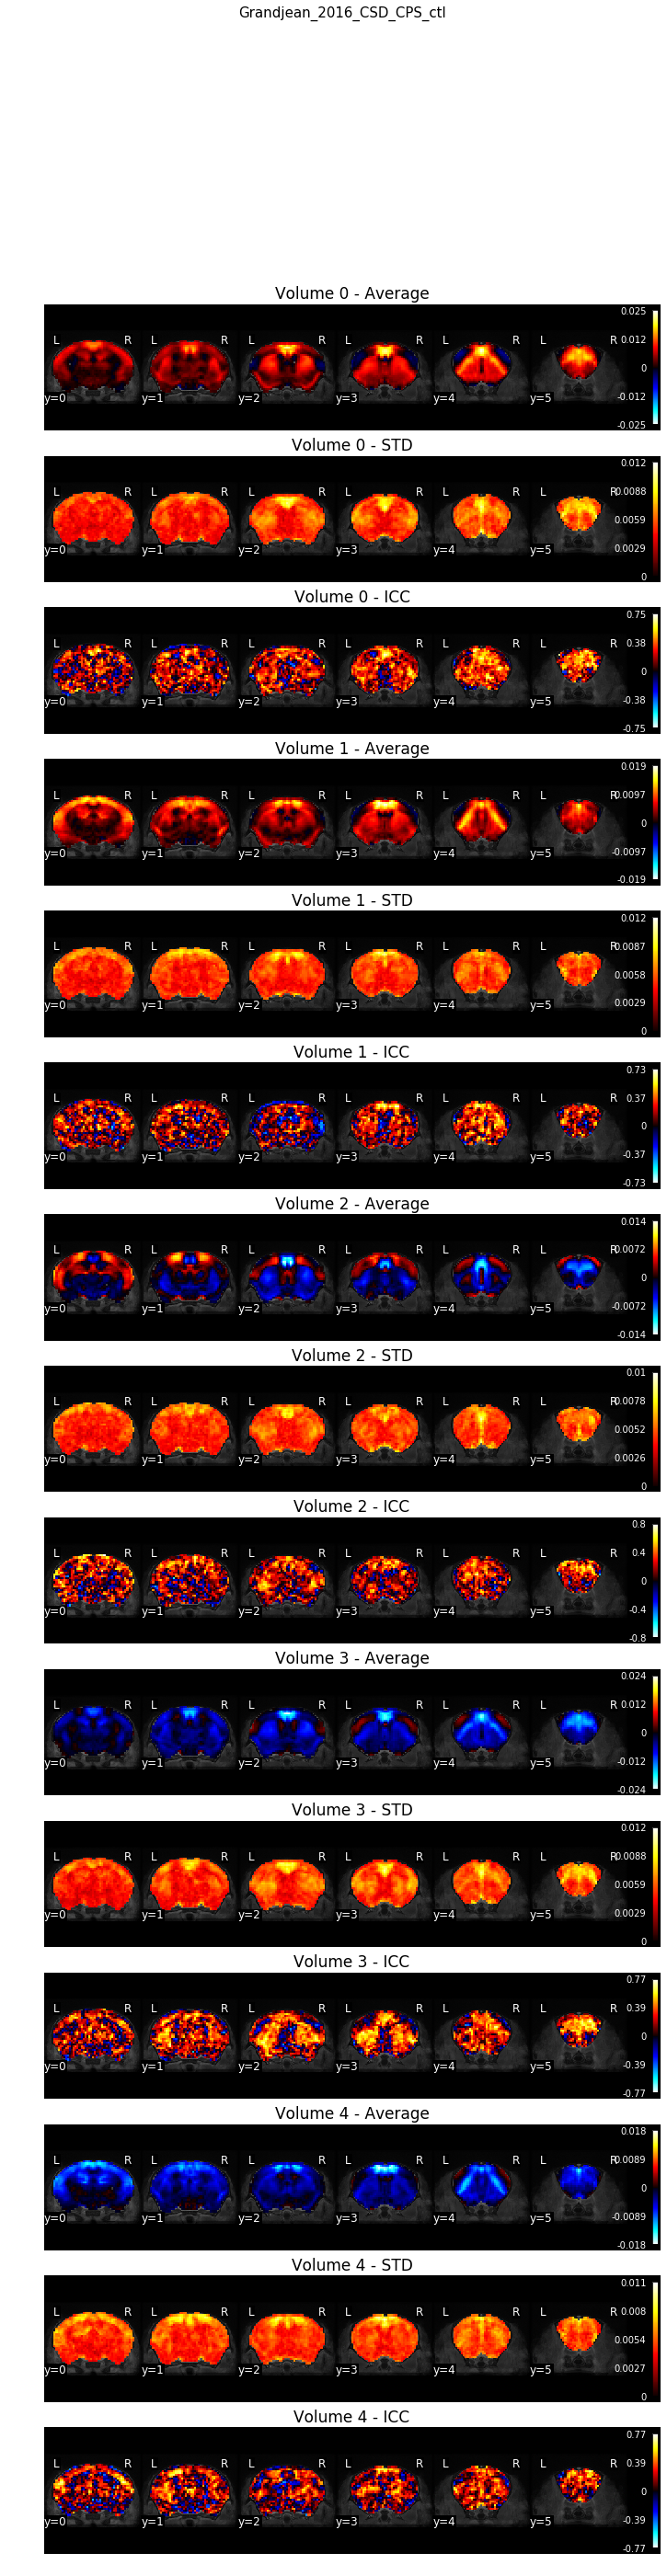

In [18]:
mask_file=metadata['mask_file']

groups=list(group_subs.keys())

shape=all_sub_FC[sub].shape

i=0

fig,axes = plt.subplots(nrows=window_length*3, ncols=1,figsize=(12,3*window_length*3))
fig.suptitle('%s' % (group), fontsize=15)
group_concat=[]
for sub in group_subs[group]:
    group_concat.append(all_sub_FC[sub].reshape(-1))
group_mean=np.array(group_concat).mean(axis=0)
group_std=np.array(group_concat).std(axis=0)
icc_map=diagnosis['template_threshold: 1.0'][group]['icc_feature_map']
icc_map=icc_map.reshape(shape)
icc_map=np.nan_to_num(icc_map)

mean_reshaped=reshape_QPP(group_mean,window_length,mask_file)
std_reshaped=reshape_QPP(group_std,window_length,mask_file)
icc_reshaped=reshape_QPP(icc_map,window_length,mask_file)
for j in range(window_length):
    ax=axes[i]
    i+=1
    plot_stat_map(analysis_functions.recover_3D(mask_file, mean_reshaped[j,:]),bg_img='DSURQE.nii.gz', axes=ax, cut_coords=(0,1,2,3,4,5), display_mode='y')
    ax.set_title('Volume %s - Average' % (str(j)), fontsize=17)

    ax=axes[i]
    i+=1
    plot_stat_map(analysis_functions.recover_3D(mask_file, std_reshaped[j,:]),bg_img='DSURQE.nii.gz', axes=ax, cut_coords=(0,1,2,3,4,5), display_mode='y')
    ax.set_title('Volume %s - STD' % (str(j)), fontsize=17)

    ax=axes[i]
    i+=1
    plot_stat_map(analysis_functions.recover_3D(mask_file, icc_reshaped[j,:]),bg_img='DSURQE.nii.gz', axes=ax, cut_coords=(0,1,2,3,4,5), display_mode='y')
    ax.set_title('Volume %s - ICC' % (str(j)), fontsize=17)
